In [1]:
import numpy as np
import cv2
import os

np.random.seed(100)

from sklearn.utils import shuffle
from PIL import Image
import keras

In [2]:
"""
Data from: https://lhncbc.nlm.nih.gov/LHC-publications/pubs/MalariaDatasets.html
"""

SIZE = 32

# Prepare data
image_dir = 'D:\Programming\Python\Data\cell_images'
x_train = []
x_anomaly = []


parasitised_img = os.listdir(image_dir + '\Parasitized')
for i, image_name in enumerate(parasitised_img):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + '\Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        x_anomaly.append(np.array(image))

        
uninfected_img = os.listdir(image_dir + '\PNoninfected')
for i, image_name in enumerate(uninfected_img):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(image_dir + '\PNoninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE,SIZE))
        x_train.append(np.array(image))


x_train = np.array(x_train)
x_anomaly = np.array(x_anomaly)

x_train = shuffle(x_train, random_state=1993)
x_anomaly = shuffle(x_anomaly, random_state=1993)

x_val = x_train[:6000, :, :, :]
x_train = x_train[6000:, :, :, :]

print(x_train.shape)
print(x_val.shape)
print(x_anomaly.shape)

(7779, 32, 32, 3)
(6000, 32, 32, 3)
(13779, 32, 32, 3)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Encoder
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

#Decoder
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))

model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

In [4]:
#Fit the model. 
history = model.fit(
        x_train/255.,
        x_train/255.,
        steps_per_epoch= 500 // 64,
        epochs=750,
        validation_data=(x_val/255., x_val/255.),
        validation_steps=75 // 64,
        shuffle = True)


Epoch 1/750
7/7 [==============================] - 37s 5s/step - loss: 0.0824 - mse: 0.0824 - val_loss: 0.0755 - val_mse: 0.0755
Epoch 2/750
7/7 [==============================] - 35s 5s/step - loss: 0.0695 - mse: 0.0695 - val_loss: 0.0591 - val_mse: 0.0591
Epoch 3/750
7/7 [==============================] - 35s 5s/step - loss: 0.0532 - mse: 0.0532 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 4/750
7/7 [==============================] - 34s 5s/step - loss: 0.0395 - mse: 0.0395 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 5/750
7/7 [==============================] - 36s 5s/step - loss: 0.0295 - mse: 0.0295 - val_loss: 0.0254 - val_mse: 0.0254
Epoch 6/750
7/7 [==============================] - 39s 6s/step - loss: 0.0230 - mse: 0.0230 - val_loss: 0.0203 - val_mse: 0.0203
Epoch 7/750
7/7 [==============================] - 36s 5s/step - loss: 0.0190 - mse: 0.0190 - val_loss: 0.0174 - val_mse: 0.0174
Epoch 8/750
7/7 [==============================] - 37s 5s/step - loss: 0.0166 - mse: 0.0166 - val

7/7 [==============================] - 36s 5s/step - loss: 0.0047 - mse: 0.0047 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 65/750
7/7 [==============================] - 35s 5s/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 66/750
7/7 [==============================] - 36s 5s/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 67/750
7/7 [==============================] - 36s 5s/step - loss: 0.0045 - mse: 0.0045 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 68/750
7/7 [==============================] - 34s 5s/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 69/750
7/7 [==============================] - 34s 5s/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 70/750
7/7 [==============================] - 34s 5s/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.0046 - val_mse: 0.0046
Epoch 71/750
7/7 [==============================] - 35s 5s/step - loss: 0.0047 - mse: 0.0047 - val_loss

Epoch 127/750
7/7 [==============================] - 34s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 128/750
7/7 [==============================] - 34s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 129/750
7/7 [==============================] - 34s 5s/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 130/750
7/7 [==============================] - 34s 5s/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 131/750
7/7 [==============================] - 33s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 132/750
7/7 [==============================] - 33s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 133/750
7/7 [==============================] - 33s 5s/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 134/750
7/7 [==============================] - 34s 5s/step - loss: 0.0038 - m

7/7 [==============================] - 34s 5s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 190/750
7/7 [==============================] - 35s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 191/750
7/7 [==============================] - 34s 5s/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 192/750
7/7 [==============================] - 35s 5s/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 193/750
7/7 [==============================] - 34s 5s/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 194/750
7/7 [==============================] - 34s 5s/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 195/750
7/7 [==============================] - 34s 5s/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 196/750
7/7 [==============================] - 34s 5s/step - loss: 0.0032 - mse: 0.0032 - v

7/7 [==============================] - 29s 4s/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 252/750
7/7 [==============================] - 28s 4s/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 253/750
7/7 [==============================] - 29s 4s/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 254/750
7/7 [==============================] - 28s 4s/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 255/750
7/7 [==============================] - 32s 5s/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 256/750
7/7 [==============================] - 32s 5s/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 257/750
7/7 [==============================] - 32s 5s/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 258/750
7/7 [==============================] - 32s 5s/step - loss: 0.0029 - mse: 0.0029 - v

7/7 [==============================] - 29s 4s/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 314/750
7/7 [==============================] - 29s 4s/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 315/750
7/7 [==============================] - 28s 4s/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 316/750
7/7 [==============================] - 28s 4s/step - loss: 0.0030 - mse: 0.0030 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 317/750
7/7 [==============================] - 28s 4s/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 318/750
7/7 [==============================] - 30s 4s/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 319/750
7/7 [==============================] - 28s 4s/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 320/750
7/7 [==============================] - 28s 4s/step - loss: 0.0028 - mse: 0.0028 - v

7/7 [==============================] - 34s 5s/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 376/750
7/7 [==============================] - 31s 5s/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 377/750
7/7 [==============================] - 31s 4s/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 378/750
7/7 [==============================] - 31s 5s/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 379/750
7/7 [==============================] - 31s 4s/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 380/750
7/7 [==============================] - 30s 4s/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 381/750
7/7 [==============================] - 33s 5s/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 382/750
7/7 [==============================] - 31s 5s/step - loss: 0.0027 - mse: 0.0027 - v

7/7 [==============================] - 33s 5s/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 438/750
7/7 [==============================] - 31s 5s/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 439/750
7/7 [==============================] - 31s 4s/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 440/750
7/7 [==============================] - 32s 5s/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 441/750
7/7 [==============================] - 34s 5s/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 442/750
7/7 [==============================] - 32s 5s/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 443/750
7/7 [==============================] - 31s 5s/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 444/750
7/7 [==============================] - 33s 5s/step - loss: 0.0025 - mse: 0.0025 - v

7/7 [==============================] - 35s 5s/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 500/750
7/7 [==============================] - 35s 5s/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 501/750
7/7 [==============================] - 34s 5s/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 502/750
7/7 [==============================] - 36s 5s/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 503/750
7/7 [==============================] - 35s 5s/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 504/750
7/7 [==============================] - 34s 5s/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 505/750
7/7 [==============================] - 36s 5s/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 506/750
7/7 [==============================] - 34s 5s/step - loss: 0.0024 - mse: 0.0024 - v

7/7 [==============================] - 35s 5s/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 562/750
7/7 [==============================] - 34s 5s/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 563/750
7/7 [==============================] - 35s 5s/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 564/750
7/7 [==============================] - 35s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 565/750
7/7 [==============================] - 35s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 566/750
7/7 [==============================] - 36s 5s/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 567/750
7/7 [==============================] - 35s 5s/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 568/750
7/7 [==============================] - 35s 5s/step - loss: 0.0025 - mse: 0.0025 - v

7/7 [==============================] - 35s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 624/750
7/7 [==============================] - 36s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 625/750
7/7 [==============================] - 35s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 626/750
7/7 [==============================] - 35s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 627/750
7/7 [==============================] - 35s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 628/750
7/7 [==============================] - 38s 6s/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 629/750
7/7 [==============================] - 38s 5s/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 630/750
7/7 [==============================] - 38s 6s/step - loss: 0.0024 - mse: 0.0024 - v

7/7 [==============================] - 36s 5s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 686/750
7/7 [==============================] - 37s 5s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 687/750
7/7 [==============================] - 37s 5s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 688/750
7/7 [==============================] - 36s 5s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 689/750
7/7 [==============================] - 37s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 690/750
7/7 [==============================] - 36s 5s/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 691/750
7/7 [==============================] - 37s 5s/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 692/750
7/7 [==============================] - 36s 5s/step - loss: 0.0022 - mse: 0.0022 - v

7/7 [==============================] - 37s 5s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 748/750
7/7 [==============================] - 37s 5s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 749/750
7/7 [==============================] - 37s 5s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 750/750
7/7 [==============================] - 37s 5s/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0023 - val_mse: 0.0023


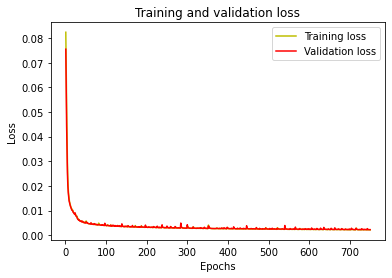

In [5]:
import matplotlib.pyplot as plt

# plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 [==============================] - 0s 67ms/step


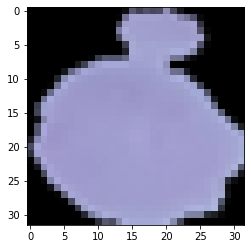

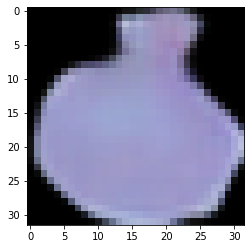

In [21]:
image_ = model.predict(np.reshape(x_val[500]/255., (1, 32,32, 3)))

plt.figure()
plt.imshow(x_val[500]/255.)

plt.figure()
plt.imshow(image_[0])


In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

x_val_pred = model.predict(x_val/255.)

rms_val = (mean_squared_error(np.reshape(x_val/255., (x_val.shape[0], x_val.shape[1]*x_val.shape[2]*x_val.shape[3])),
                                  np.reshape(x_val_pred, (x_val_pred.shape[0], 
                                                          x_val_pred.shape[1]*x_val_pred.shape[2]*x_val_pred.shape[3]))))

x_anomaly_pred = model.predict(x_anomaly/255.)

rms_anomaly = (mean_squared_error(np.reshape(x_anomaly/255., (x_anomaly.shape[0],
                                                                  x_anomaly.shape[1]*x_anomaly.shape[2]*x_anomaly.shape[3])),
                                  np.reshape(x_anomaly_pred, (x_anomaly_pred.shape[0], 
                                                          x_anomaly_pred.shape[1]*x_anomaly_pred.shape[2]*x_anomaly_pred.shape[3]))))

431/431 [==============================] - 18s 41ms/step


In [29]:
# Examine the reconstruction error between our validation data (good/normal images)
# and the anomaly images

print("Recon. error for the validation (normal) data is: ", rms_val)
print("Recon. error for the anomaly data is: ", rms_anomaly)


Recon. error for the validation (normal) data is:  0.0022659359395005916
Recon. error for the anomaly data is:  0.0037884593023556953


In [39]:
x_val_err = x_val/255. - x_val_pred
val_err = []

for i in range(len(x_val_err)):
    err = np.mean(np.reshape(x_val_err[i], (1, 32*32*3)))**2
    val_err.append(err)

x_anomaly_err = x_anomaly/255. - x_anomaly_pred
anomaly_err = []

for i in range(len(x_anomaly_err)):
    err = np.mean(np.reshape(x_anomaly_err[i], (1, 32*32*3)))**2
    anomaly_err.append(err)

val_err = np.array(val_err)
anomaly_err = np.array(anomaly_err)

print(val_err.shape)
print(anomaly_err.shape)

(6000,)
(13779,)


In [40]:
mu_val = np.mean(val_err)
std_val = np.std(val_err)

mu_anomaly = np.mean(anomaly_err)
std_anomaly = np.std(anomaly_err)

print("mu_val is ", mu_val)
print("std_val is ", std_val)
print("mu_anomaly is ", mu_anomaly)
print("std_anomaly is ", std_anomaly)

mu_val is  2.059870939795312e-05
std_val is  2.583867223458558e-05
mu_anomaly is  3.0391251807191727e-05
std_anomaly is  3.746404752877346e-05


<AxesSubplot:ylabel='Count'>

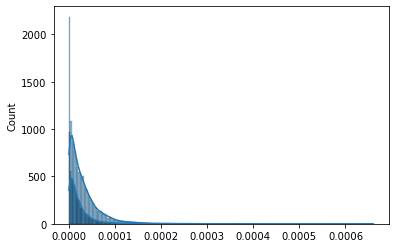

In [41]:
import seaborn as sns

plt.figure()
sns.histplot(data=val_err, kde=True)
sns.histplot(data=anomaly_err, kde=True)




In [42]:
#This is used to get the compressed output (latent space) of the input image. 
#The compressed output is then used to calculate the KDE

encoder_model = Sequential()
encoder_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(SIZE, SIZE, 3), weights=model.layers[0].get_weights()) )
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(32, (3, 3), activation='relu', padding='same', weights=model.layers[2].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.add(Conv2D(16, (3, 3), activation='relu', padding='same', weights=model.layers[4].get_weights()))
encoder_model.add(MaxPooling2D((2, 2), padding='same'))
encoder_model.summary()

########################################################


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 16)          4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)        

In [45]:
# Calculate KDE using sklearn
from sklearn.neighbors import KernelDensity

#Get encoded output of input images = Latent space
encoded_images = encoder_model.predict(x_train/255.)

# Flatten the encoder output because KDE from sklearn takes 1D vectors as input
encoder_output_shape = encoder_model.output_shape #Here, we have 16x16x16
out_vector_shape = encoder_output_shape[1]*encoder_output_shape[2]*encoder_output_shape[3]

encoded_images_vector = [np.reshape(img, (out_vector_shape)) for img in encoded_images]

print(len(encoded_images_vector))

244/244 [==============================] - 3s 14ms/step
7779


In [46]:
#Fit KDE to the image latent data
kde = KernelDensity(kernel='gaussian', bandwidth=0.2).fit(encoded_images_vector)

#Calculate density and reconstruction error to find their means values for
#good and anomaly images. 
#We use these mean and sigma to set thresholds. 
def calc_density_and_recon_error(batch_images):
    
    density_list=[]
    recon_error_list=[]
    for im in range(0, batch_images.shape[0]-1):
        
        img  = batch_images[im]
        img = img[np.newaxis, :,:,:]
        encoded_img = encoder_model.predict([[img]]) # Create a compressed version of the image using the encoder
        encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] # Flatten the compressed image
        density = kde.score_samples(encoded_img)[0] # get a density score for the new image
        reconstruction = model.predict([[img]])
        reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]
        density_list.append(density)
        recon_error_list.append(reconstruction_error)
        
    average_density = np.mean(np.array(density_list))  
    stdev_density = np.std(np.array(density_list)) 
    
    average_recon_error = np.mean(np.array(recon_error_list))  
    stdev_recon_error = np.std(np.array(recon_error_list)) 
    
    return average_density, stdev_density, average_recon_error, stdev_recon_error



In [61]:
#Get average and std dev. of density and recon. error for uninfected and anomaly (parasited) images. 
#For this let us generate a batch of images for each. 
train_batch = x_train[:64]/255.
anomaly_batch = x_anomaly[:64]/255.

uninfected_values = calc_density_and_recon_error(train_batch)
anomaly_values = calc_density_and_recon_error(anomaly_batch)


1/1 [==============================] - 0s 24ms/step - loss: 0.0113 - mse: 0.0113


1/1 [==============================] - 0s 47ms/step - loss: 0.0039 - mse: 0.0039


1/1 [==============================] - 0s 120ms/step - loss: 0.0029 - mse: 0.0029


In [68]:
print(uninfected_values)
print("----")
print(anomaly_values)

(167.8086580254023, 8.186746760906305e-08, 0.0030307064584959003, 0.002495615313065656)
----
(107.17056993736922, 57.795233006641716, 0.0050540351999982715, 0.0032101588219024834)


In [106]:
#Now, input unknown images and sort as Good or Anomaly
def check_anomaly(img_path):
    density_threshold = 160 #Set this value based on the above exercise
    reconstruction_error_threshold = 0.0025 # Set this value based on the above exercise
    img  = Image.open(img_path)
    img = np.array(img.resize((32,32), Image.ANTIALIAS))
    plt.imshow(img)
    img = img / 255.
    img = img[np.newaxis, :,:,:]
    encoded_img = encoder_model.predict([[img]]) 
    encoded_img = [np.reshape(img, (out_vector_shape)) for img in encoded_img] 
    density = kde.score_samples(encoded_img)[0] 

    reconstruction = model.predict([[img]])
    reconstruction_error = model.evaluate([reconstruction],[[img]], batch_size = 1)[0]

    if density < density_threshold or reconstruction_error > reconstruction_error_threshold:
        print("The image is an anomaly")
        print("KDE =", density)
        print("reconstruction_error =", reconstruction_error)
        
    else:
        print("The image is NOT an anomaly")
        print("KDE =", density)
        print("reconstruction_error =", reconstruction_error)


1/1 [==============================] - 0s 20ms/step - loss: 0.0109 - mse: 0.0109
The image is an anomaly
KDE = 138.38797091073286
reconstruction_error = 0.010898254811763763


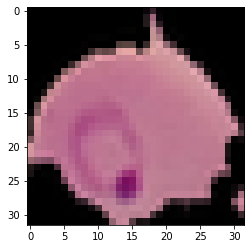

In [119]:
import random
#Load a couple of test images and verify whether they are reported as anomalies.
import glob
para_file_paths = glob.glob('D:\Programming\Python\Data\cell_images\Parasitized\*')

#Anomaly image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly(para_file_paths[num])


1/1 [==============================] - 0s 25ms/step - loss: 0.0021 - mse: 0.0021
The image is NOT an anomaly
KDE = 162.07373283785847
reconstruction_error = 0.002070114016532898


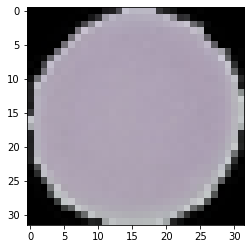

In [118]:

uninfected_file_paths = glob.glob('D:\Programming\Python\Data\cell_images\PNoninfected\*')

#Good/normal image verification
num=random.randint(0,len(para_file_paths)-1)
check_anomaly(uninfected_file_paths[num])
